In [20]:
# Import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

In [ ]:
#use function to import data

In [26]:
def wrangle(filepath):
    df=pd.read_csv(filepath)
    return df

In [28]:
# Use this cell to test your wrangle function and explore the data
df=wrangle(r"C:\Users\kelvin\OneDrive\Desktop\iris.csv")
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Use glob to create the list files. It should contain the filenames of all the iris csv
in the ./data directory, except for mexico-city-test-features.csv.

In [33]:
import glob
files = glob.glob("iris*.csv")
files

[]

Combine your wrangle function, a list comprehension, and pd.concat to create a DataFrame df. 
It should contain all the properties 
from the five CSVs in files.

In [ ]:
frames=[wrangle(file) for file in files]
df = pd.concat(frames,ignore_index=True)
print(df.info())
df.head()

In [ ]:
frames = [wrangle(filepath) for file in files]
file = pd.concat(frames,ignore_index=True)
print(df.info())
df.head()

Create a histogram showing the distribution of apartment prices ('Sepal_Length') in df. 
Be sure to label the x-axis "Length", 
the y-axis "Count", and give it the title "Distribution ".

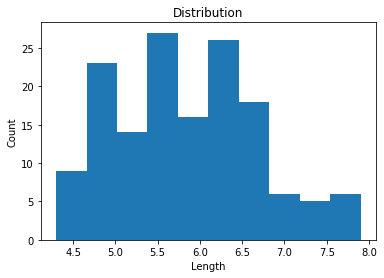

In [35]:
# Plot distribution of price
plt.hist(df['Sepal_Length'])
plt.xlabel("Length")
plt.ylabel('Count')
plt.title('Distribution')
plt.show()

In [ ]:
Create a histogram showing the distribution of apartment prices ("price_aprox_usd") in df. Be sure to label the x-axis "Area [sq meters]", the y-axis "Count", and give it the title "Distribution of Apartment Prices".

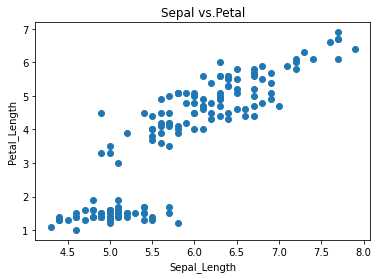

In [41]:
# Build scatter plot
plt.scatter(df["Sepal_Length"],df["Petal_Length"])


# Label axes
plt.xlabel("Sepal_Length")
plt.ylabel("Petal_Length")
# Add title
plt.title("Sepal vs.Petal");

Create a scatter plot that shows apartment price (['Sepal_Width']) as
a function of apartment size ("surface_covered_in_m2") and ['Sepal_Width'], 
respectively. 
Your plot should have the title.

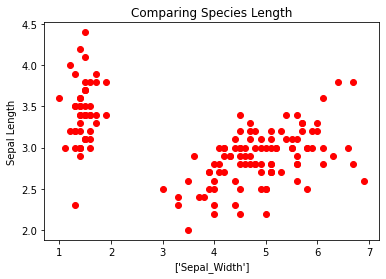

In [102]:
# Plot price vs area
plt.scatter(df['Petal_Length'],df['Sepal_Width'], color = "r")
plt.xlabel(['Sepal_Width'])
plt.ylabel('Sepal Length')
plt.title('Comparing Species Length')
plt.show()

Create your feature matrix X_train and target vector y_train. Your target is "Petal_Length". 
Your features should be all the columns that remain 
in the DataFrame you cleaned above.

In [101]:
features= ["Sepal_Length"]
X_train = df[features]

y_target ="Petal_Length"
y_train = df[y_target]
print("X_train.shape:",X_train.shape)
y_train.shape

X_train.shape: (150, 1)


(150,)

In [47]:
# Split data into feature matrix `X_train` and target vector `y_train`.
X_train = df.drop(columns=['Petal_Length'])
y_train = df['Sepal_Length']
print("X_train.shape:",X_train.shape)
y_train.shape

X_train.shape: (150, 4)


(150,)

In [49]:
from sklearn.metrics import mean_absolute_error

Calculate the baseline mean absolute error for your model

In [ ]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean]*len(y_train)
baseline_mae = mean_absolute_error(y_train,y_pred_baseline)
print("Mean apt price:", y_mean)
print("Baseline MAE:", baseline_mae)

Baseline
Calculate the baseline mean absolute error for your model

In [55]:
y_mean =y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
baseline_mae = mean_absolute_error(y_train,y_pred_baseline)
print("baseline:",baseline_mae)
print("Mean error:",y_mean)

baseline: 0.6875555555555557
Mean error: 5.843333333333335


importing all libraries

In [89]:
from category_encoders import OneHotEncoder
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge  # noqa F401
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted

Iterate
Creating a pipeline named model that contains all the transformers necessary for
this dataset and one of the predictors you've used during this project. 
Then fitting the model to the training data.

In [90]:
# Build Model
model = make_pipeline(OneHotEncoder(use_cat_names=True),SimpleImputer(),Ridge())
# Fit model
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Species'], use_cat_names=True)),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

Iterate
Creating a pipeline named model that contains all the transformers necessary for
this dataset and one of the predictors you've used during this project. 
Then fitting the model to the training data.#

In [84]:
# Fit model
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

Read the CSV file iris into the DataFrame X_test.

In [95]:
X_test = pd.read_csv(r"C:\Users\kelvin\OneDrive\Desktop\iris_test.csv")
print(X_test.info())
X_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Width   150 non-null    float64
 3   Species       150 non-null    object 
dtypes: float64(3), object(1)
memory usage: 4.8+ KB
None


,Sepal_Length,Sepal_Width,Petal_Width,Species
0,5.1,3.5,0.2,setosa
1,4.9,3.0,0.2,setosa
2,4.7,3.2,0.2,setosa
3,4.6,3.1,0.2,setosa
4,5.0,3.6,0.2,setosa


Using model to generate a Series of predictions for X_test. When you submit your predictions to the grader,
it will calculate the mean absolute error for your model.

In [96]:
y_test_pred = pd.Series(model.predict(X_test))
y_test_pred.head()

0    5.097906
1    4.894404
2    4.705261
3    4.606587
4    5.003335
dtype: float64

# Communicating Result

In [100]:
coefficients = model.named_steps['ridge'].coef_
features = model.named_steps['onehotencoder'].get_feature_names()
feat_imp = pd.Series(coefficients,index=features).sort_values(ascending=True,key=abs)
feat_imp

Species_versicolor    0.006736
Species_virginica     0.012557
Petal_Width           0.016996
Species_setosa       -0.019293
Sepal_Width           0.020513
Sepal_Length          0.966228
dtype: float64

<AxesSubplot:>

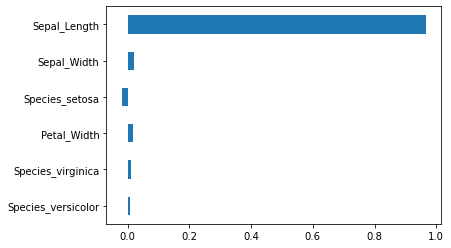

In [98]:
# Create horizontal bar chart
feat_imp.head(10).plot(kind='barh')